## **Install and Import Dependencies**

In [ ]:
!pip install openbharatocr

In [ ]:
import openbharatocr

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

## **Read in Images**

In [ ]:
Image_path = '/content/Screenshot 2026-02-08 203954.png'

In [ ]:
from PIL import Image
import os

# Open the image using PIL
img = Image.open(Image_path)

# Convert RGBA to RGB if necessary
if img.mode == 'RGBA':
    img = img.convert('RGB')

# Save the converted image to a temporary JPEG file
temp_image_path = '/content/temp_image.jpg'
img.save(temp_image_path, 'JPEG')

# Extract PAN card details using the temporary JPEG file
result = openbharatocr.pan(temp_image_path)

# Clean up the temporary file
os.remove(temp_image_path)

# Returns: {'name': str, 'father_name': str, 'dob': str, 'pan_number': str}

In [ ]:
result

{'Full Name': 'D MANIKANDAN SE',
 "Parent's Name": 'DURAISAMY',
 'Date of Birth': '16/07/1986',
 'PAN Number': 'BNZPM2501F'}

## **Draw Results**

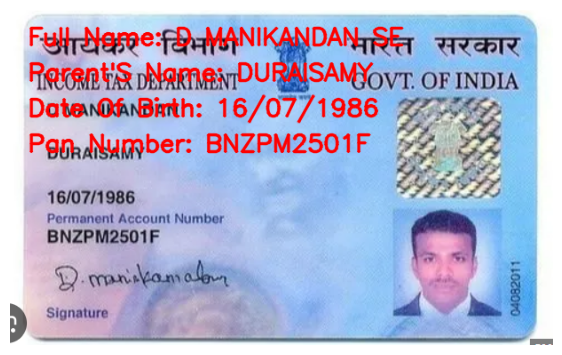

In [ ]:
img = cv2.imread(Image_path)

font = cv2.FONT_HERSHEY_SIMPLEX
color = (0, 0, 255)   # Red – high contrast on PAN card
thickness = 2

y = 40
line_gap = 40

for key, value in result.items():
    text = f"{key.replace('_', ' ').title()}: {value}"
    cv2.putText(img, text, (20, y), font, 0.9, color, thickness, cv2.LINE_AA)
    y += line_gap

plt.figure(figsize=(7, 7))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()
